<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Pre-requisites" data-toc-modified-id="Pre-requisites-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-requisites</a></span></li><li><span><a href="#Source-code" data-toc-modified-id="Source-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Source code</a></span></li><li><span><a href="#Isolated-power-system" data-toc-modified-id="Isolated-power-system-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Isolated power system</a></span></li><li><span><a href="#State-space-model-of-the-system" data-toc-modified-id="State-space-model-of-the-system-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>State-space model of the system</a></span></li><li><span><a href="#Design-requirements" data-toc-modified-id="Design-requirements-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Design requirements</a></span></li><li><span><a href="#MPC-SSTO-tracking-problem-formulation" data-toc-modified-id="MPC-SSTO-tracking-problem-formulation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>MPC-SSTO tracking problem formulation</a></span></li><li><span><a href="#Cost-function" data-toc-modified-id="Cost-function-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Cost function</a></span></li><li><span><a href="#Defining-the-inequality-constraints" data-toc-modified-id="Defining-the-inequality-constraints-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Defining the inequality constraints</a></span></li><li><span><a href="#Target-equilibrium-optimization-under-constraints-(SSTO)" data-toc-modified-id="Target-equilibrium-optimization-under-constraints-(SSTO)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Target equilibrium optimization under constraints (SSTO)</a></span></li><li><span><a href="#Solving-the-LQ-MPC-optimization-problem" data-toc-modified-id="Solving-the-LQ-MPC-optimization-problem-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Solving the LQ-MPC optimization problem</a></span></li><li><span><a href="#Stability" data-toc-modified-id="Stability-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Stability</a></span></li><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Algorithm</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Init" data-toc-modified-id="Init-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#System:-continuos-to-discrete" data-toc-modified-id="System:-continuos-to-discrete-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>System: continuos to discrete</a></span></li><li><span><a href="#Constraints" data-toc-modified-id="Constraints-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>Constraints</a></span></li><li><span><a href="#Target-equilibrium-pairs-and-optimization-under-constraints" data-toc-modified-id="Target-equilibrium-pairs-and-optimization-under-constraints-14.4"><span class="toc-item-num">14.4&nbsp;&nbsp;</span>Target equilibrium pairs and optimization under constraints</a></span></li><li><span><a href="#Constraints-for-SSTO-model" data-toc-modified-id="Constraints-for-SSTO-model-14.5"><span class="toc-item-num">14.5&nbsp;&nbsp;</span>Constraints for SSTO model</a></span></li><li><span><a href="#Prediction,-Constraint-and-Cost-matrices" data-toc-modified-id="Prediction,-Constraint-and-Cost-matrices-14.6"><span class="toc-item-num">14.6&nbsp;&nbsp;</span>Prediction, Constraint and Cost matrices</a></span></li><li><span><a href="#Check-if-closed-loop-system-is-stable" data-toc-modified-id="Check-if-closed-loop-system-is-stable-14.7"><span class="toc-item-num">14.7&nbsp;&nbsp;</span>Check if closed-loop system is stable</a></span></li><li><span><a href="#Calculate-the-terminal-cost-matrix-P" data-toc-modified-id="Calculate-the-terminal-cost-matrix-P-14.8"><span class="toc-item-num">14.8&nbsp;&nbsp;</span>Calculate the terminal cost matrix P</a></span></li><li><span><a href="#For-loop" data-toc-modified-id="For-loop-14.9"><span class="toc-item-num">14.9&nbsp;&nbsp;</span>For loop</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

A constrained Linear Quadratic Model Predictive Model Control (LQ-MPC) with offset-free tracking and disturbance rejection using the feed-forward Steady-State Target Optimization (SSTO) approach is presented in this paper. The MPC control law uses Finite-Receding-Horizon method in dual-mode. The stability and recursive feasibility are guaranteed by off-line dual-mode and on-line optimization. The results are presented by simulation.

# Pre-requisites

- Control Systems theory.
- MPC theory.
- Previous post of [constrained MPC](/blog/MPCc/).
- Convex quadratic optimization theory.
- Jupyter Notebook with Matlab-kernel.
- Matlab.

# Source code

Version [PDF](https://raw.githubusercontent.com/paulomarconi/MPC-SSTO/master/report/root.pdf)/[HTML](../../files/MPC-SSTO/MPC-SSTO.html). Matlab and LaTex source code on [GitHub](https://github.com/paulomarconi/MPC-SSTO). 


# Isolated power system

The operation of an isolated power system under primary frequency control is modelled by the following block diagram.
<figure>
    <img src="/images/MPC-SSTO/plant.png" alt="plant" width="60%"/>
    <center><figcaption>Fig.1 - Isolated Power System </figcaption></center>
</figure> 

In this system, a steam turbine produces mechanical power, which is subsequently converted to electrical power via a synchronous generator connected to the grid. A change in power demand, $\Delta p^d$, causes the system frequency $f[Hz]$ to change. The control objective is to drive frequency deviations, $\Delta f$, to zero following a demand change, $\Delta p^d$. To aid this, a governor controls the steam flow input to the turbine in response to the error between the reference power $\Delta p^{ref}$ and the regulated frequency $\Delta\omega /R$, where $R>0$ is the regulation factor.

The primary frequency control loop present in the system is, unfortunately, unable to regulate the frequency error to zero following demand changes. Therefore, the aim is to design a secondary frequency control loop that will adjust the reference power $\Delta p_{ref}$ in response to frequency deviations $\Delta\omega$, in order to eliminate error and improve transient performance. 


# State-space model of the system

The isolated power system to be studied is a linear Single-Input Single-Output (SISO) model with the addition of the disturbance in the output. The linear continuous-time state-space model is,,

\begin{align*}\tag{1}
\begin{bmatrix}
	\Delta\dot{\omega} \\
	\Delta\dot{p}^m \\	 
	\Delta\dot{p}^v \\
\end{bmatrix}
&=
\begin{bmatrix}
	-D/M & 1/M & 0 \\
	0 & -1/T^t & -1/T^t \\
	-1/(RT^g) & 0 & -1/T^g
\end{bmatrix}
\begin{bmatrix}
	\Delta \omega \\
	\Delta p \\	 
	\Delta p^v 
\end{bmatrix}
+
\begin{bmatrix}
	0 \\
	0 \\
	1/T^g
\end{bmatrix}
\Delta p^{ref}
+
\begin{bmatrix}
	-1/M \\
	0 \\
	0
\end{bmatrix}
\Delta p^d\\
\Delta f &=
\begin{bmatrix}
	50 & 0 & 0 
\end{bmatrix}
\begin{bmatrix}
	\Delta \omega \\
	\Delta p \\	 
	\Delta p^v 
\end{bmatrix}
+ 
\Delta p^d
\end{align*}


In this model, the input, $u$, is the change in reference power to the turbine governor, i.e., $\Delta p_{ref}$ (in per unit (p.u.) – that is, normalized with respect to a base value), and the output, $y$, is the frequency of the power system, i.e., $\Delta f~[Hz]$. The states are the (deviations from operating points in) angular frequency, $\Delta \omega$, mechanical output power of the steam turbine, $\Delta p^m$, and output power reference from the turbine governor, $\Delta p^v$. The demand change $\Delta p^d$ is a disturbance, $d$. For the particular power system under consideration, the model parameters are:
$$ 
M = 10,~D=0.8,~R=0.1,~T^t=0.5,~T^g=0.2
$$





# Design requirements

In response to a large step-change in demand—up to $0.3~p.u.$ in magnitude—the closed-loop system.
- Maintains stability.
- Frequency settles to $|\Delta f| \leq 0.01 [Hz]$ within 2 seconds of the disturbance initiation.
- Exhibits zero steady-state error in the output.
- Satisfies the constraints.
\begin{align*}
|\Delta p^{ref}| &\leq 0.5 \\
|\Delta f| &\leq 0.5
\end{align*}



# MPC-SSTO tracking problem formulation

The Feedfoward tracking approach by SSTO requires a target optimizer that calculates the steady-state values for the states $x_{ss}$ and the input $u_{ss}$ given a reference $r$ in the presence of a disturbance $d$.

<figure>
    <img src="/images/MPC-SSTO/MPC-SSTO.png" alt="MPC-SSTO" width="50%"/>
    <center><figcaption>Fig.2 - MPC and SSTO model</figcaption></center>
</figure> 


For the Discrete Linear Time-Invariant (DLTI) state-space system,
\begin{align*}\tag{2}
x(k+1) &= A~x(k)+B~u(k)+B_d~d(k)\\
y(k) &= C~x(k)+D_d~d(k), \quad k=0,1,2,\dots
\end{align*}
where $x\in\mathbb{R}^n$, $u\in\mathbb{R}^m$, $y\in\mathbb{R}^p$, and $d\in\mathbb{R}^q$ are the states, input, output, and disturbance vectors respectively. $A,B,C,$ are the state, input, and output matrices, and $B_d,D_d$ are the disturbance matrices in the input, and in the output. $k$ is the sampling time.

The idea is to compute,
$$ x \rightarrow x_{ss}, \quad u \rightarrow u_{ss} $$
defining two auxiliar variables as,
$$ \xi \approx x - x_{ss}, \quad v \approx u - u_{ss} $$

Therefore, the objective is to regulate,
$$ \xi \rightarrow 0, \quad v \rightarrow 0 $$
where, $x_{ss}$ and $u_{ss}$ are the Steady-State target values.


# Cost function

The problem ${\rm I\!P}_N$ is to minimize $v(k)$ given the following cost function,
\begin{align}\tag{3}
	{\rm I\!P}_N (v(k)) : \min_{v(k)}\sum_{j=0}^{N-1} & (\xi^\intercal(k+j|k)~Q~\xi(k+j|k) + v^\intercal(k+j|k)~R~v(k+j|k)) + \xi^\intercal(k+N|k)~P~\xi(k+N|k) \\
\end{align}

subject to,

\begin{align*}
	\xi(k+1+j|k) &= A~\xi(k+j|k)+B~v(k+j|k) \\
	\xi(k|k) &= \xi(k) \\
	P_x ( \xi(k+j|k) + x_{ss} )&\leq q_x \\
	P_u ( v(k+j|k) + u_{ss} )&\leq q_u  \\
	P_{x_N}~\xi(k+N|k) &\leq \tilde{q}_{x_N}\\	 
\end{align*}

for $j = 0, 1, 2, \dots, N-1$.

Where $Q$ and $R$ are weight matrices, $P$ is the terminal cost matrix, $P_x$, $P_u$, $P_{x_N}$ are the linear inequality (polyhedra) constraints, $N$ is the finite-horizon. Note that $B_d,D_d$ and $d$ are not present because the SSTO will manage the disturbance rejection.


# Defining the inequality constraints

Given $|\Delta p^{ref}|=|u|\leq u_{min,max}$, and $|\Delta f|=|y|\leq y_{min,max}$, for $y=C~x$, 
\begin{align*}
\begin{bmatrix}
	C \\
	-C
\end{bmatrix}
	x(k+j|k) & \leq
\begin{bmatrix}
	y_{max}\\
	-y_{min}
\end{bmatrix}
\\
\begin{bmatrix}
	I \\
	-I
\end{bmatrix}
	u(k+j|k) & \leq
\begin{bmatrix}
	u_{max}\\
	-u_{min}
\end{bmatrix}
\end{align*}

can be written in terms of $\xi$ and $v$ as follows,

\begin{align}\tag{4}
{\underbrace{
\begin{bmatrix}
	C \\
	-C
\end{bmatrix}}_{P_x}
}
	\xi(k+j|k) & \leq
{\underbrace{
\begin{bmatrix}
	y_{max}\\
	-y_{min}
\end{bmatrix}}_{q_x}
}
-
{\underbrace{
\begin{bmatrix}
	C \\
	-C
\end{bmatrix}}_{P_x}
}
	x_{ss}
\end{align}

\begin{align}\tag{5}
{\underbrace{
\begin{bmatrix}
	I \\
	-I
\end{bmatrix}}_{P_u}
}
	v(k+j|k) & \leq
{\underbrace{
\begin{bmatrix}
	u_{max}\\
	-u_{min}
\end{bmatrix}}_{q_u}
}
-
{\underbrace{
\begin{bmatrix}
	I \\
	-I
\end{bmatrix}}_{P_u}
}
	u_{ss}
\end{align}

and using a proper **deadbeat mode-2** terminal inequality constraint to ensure a fast convergence to zero,

\begin{align}\tag{6}
&
{\underbrace{
	\textbf{I}_{n\times n}\otimes
	\begin{bmatrix}
	P_x\\
	P_u~K_\infty
	\end{bmatrix}
	\begin{bmatrix}
		(A+BK_\infty)^0\\
		\vdots\\
		(A+BK_\infty)^{N-1}
	\end{bmatrix}
}_{P_{x_N}}
}
\xi(k+N|k)
\leq 
{\underbrace{
	\textbf{1}_n \otimes 
	\begin{bmatrix}
		q_x-P_x~x_{ss}\\
		q_u-P_u~u_{ss}
	\end{bmatrix}
}_{\tilde{q}_{x_N}}
}
\end{align}
where $K_\infty$ is the deadbeat mode-2 gain calculated using Linear Quadratic Regulator (LQR) method.

# Target equilibrium optimization under constraints (SSTO)

The offset-free equilibrium points $(x_{ss},u_{ss})$ that satisfies the constraints exits if only if $x_{ss}=A x_{ss}+B u_{ss}+B_d d$ and $y_{ss}=C x_{ss}+D_d d=r$. 

Thus, the SSTO problem is
\begin{align}\tag{7}
	\min_{\left\lbrace x_{ss},u_{ss} \right\rbrace } \|C~x_{ss}+D_d~d-r\|+\rho \|u_{ss}\|
\end{align}

subject to,

\begin{align*}
{\underbrace{
	\begin{bmatrix}
		I-A & -B\\
		C & 0
	\end{bmatrix}}_{A_{eq}=T}
}
{\underbrace{
	\begin{bmatrix}
		x_{ss}\\
		u_{ss}
	\end{bmatrix}}_{x_{eq}}
}
&=
{\underbrace{
	\begin{bmatrix}
		B_d\\
		r-D_d
	\end{bmatrix} 
	d 
	}_{b_{eq}}	
}
\\
{\underbrace{
		\begin{bmatrix}
		P_x & 0\\
		0 & P_u
		\end{bmatrix}}_{A_{neq}}
}
{\underbrace{
		\begin{bmatrix}
		x_{ss}\\
		u_{ss}
		\end{bmatrix}}_{x_{neq}}
}
&\leq
{\underbrace{
		\begin{bmatrix}
		q_x\\
		q_u
		\end{bmatrix}}_{b_{neq}}
}
\end{align*}
where $\rho$ is a penalty constant.


# Solving the LQ-MPC optimization problem

The solution of the LQ-MPC problem in compact form can written as,
\begin{align}\tag{8}
	\min_{v(k)} \frac{1}{2}\textbf{v}^\intercal(k)~H~\textbf{v}(k) + \xi^\intercal(k)~L^\intercal~\textbf{v}(k)+\xi^\intercal(k)~M~\xi(k)
\end{align}
subject to,
\begin{align*}
	P_c \textbf{v}(k) \leq q_c+S_c~\xi(k)
\end{align*}
where $H,L,M$ are the cost matrices given $Q$ and $R$. $P_c,~q_c,~S_c$ are the stacked inequality constraints for $P_x,~P_u,~P_{x_N},~q_u,~q_x,~\tilde{q}_{x_N}$ given the predictions matrices $\textbf{x}=Fx(k)+G\textbf{u}(k)$. Note that the prediction matrices are constructed using the states and input without the tracking model.

The solution of (5) is the optimal control input sequence,
\begin{align*}
	\textbf{v}^*=\left\lbrace v^*(k|k),v^*(k+1|k),\dots,v^*(k+N-1|k) \right\rbrace
\end{align*}
which can be solved numerically.

Because MPC uses the receding-horizon principle, only the first optimized control input is needed
\begin{align*}
	v(k)=v^*(k|k)=\kappa_N(\xi(k))
\end{align*}
but the real control input applied to the system is
\begin{align}\tag{9}
	u(k)=u_{ss}+v^*(k|k)
\end{align}

# Stability

In order to ensure stability it is necessary to compute a terminal cost matrix $P$ that satisfies the Lyapunov equation 
\begin{equation*}
	(A+B~K)^\intercal P(A+B~K)-P+(Q+K^\intercal R~K)=0
\end{equation*}
which solution can be computed numerically. A good approach is to use a deadbeat mode-2 control gain $K$ that converges the states to the origin $x=0$ as long as $(A+BK)$ is stable, which means that the eigenvalues $\lambda$ are inside the unit circle, $|\lambda| < 1$.

# Algorithm

Now that the solution of the LQ-MPC is established and the stability can be guaranteed, there are basic conditions to meet such as 
- $(A,B)$ is stabilizable which can be proved by the controllability, in Matlab `rank(ctrb(A,B))`.
- $Q\succeq 0$, can be $C^\intercal C$	
- $R\succ 0$, changed later for tuning.

<img src="/images/MPC-SSTO/algorithm.png" alt="drawing" width="60%"/>



# Simulation

## Init

In [59]:
clear variables;
options = optimset('Display','off');
%% Global variables
x0 = [0; 0; 0];
r = 0.3;        % reference

model_d = 1;    % model with disturbance, 1=yes, 0=no
d = 0;          % init value of the perturbation

N = 3;          % Horizon increase N and cost value J(k) is reduced
nk = 80;        % simulation steps

rho = 1;        % SSTO optimization

% Q and R for tunning
Qdesign = 1; 
Rdesign = .08; 

## System: continuos to discrete

In [60]:
Msys = 10; Dsys = 0.8; Rsys = 0.1; Tt = 0.5; Tg = 0.2;

Ac = [-Dsys/Msys       1/Msys        0   ;
          0            -1/Tt        1/Tt ;
     -1/(Rsys*Tg)        0         -1/Tg  ];
Bc = [0; 0; 1/Tg];

if model_d==1 
    Bd = [-1/Msys; 0; 0;]; % Bd=disturbance matrix
else
    Bd = [0; 0; 0];
end

C = [50, 0, 0];
D = 0;
Ts = 0.1; %sampling time

% Continuos + disturbance
sys = idss(Ac,Bc,C,D,Bd,x0,0); 

% Converting to discrete model
sysd = c2d(sys,Ts);
A = sysd.A; 
B = sysd.B; 
C = sysd.C; 
D = sysd.D; 
Bd = -sysd.K; 

if model_d == 1
    Dd = 1;
else 
    Dd = 0;
end

## Constraints

In [61]:
% Input constraints
u_max = 0.5; u_min = 0.5;
Pu = [1; -1];
qu = [u_max; u_min]; 

% State constraints
y_max = 0.5; y_min = 0.5;
Px = [eye(3).*C; -eye(3).*C];
qx = [ones(3,1)*y_max; ones(3,1)*y_min];


## Target equilibrium pairs and optimization under constraints

In [62]:
% Target
T = [eye(3)-A, -B; C 0];
Tinv = T\[Bd*d; r-Dd*d];   
xss = Tinv(1:3);
uss = Tinv(4);

% Optimization problem
x_optVect = [xss; uss]; % vector x for optimization problem A*x<b

fun = @(x_optVect)  ( C(1)*x_optVect(1)+Dd*d-r ) + rho*x_optVect(4) ;  
x0_opt = [r, 0, 0, 0]; % init values

% Equality constraints
Aeq = T; 
beq = [Bd*d; r-Dd*d];

% Inequality constraints
Aopt = [Px, zeros(6,1); zeros(2,3), Pu]; 
bopt = [qx; qu];

% Minimization 
[f,fval] = fmincon(fun,x0_opt,Aopt,bopt,Aeq,beq,[],[],[],options);
xss = f(1:3)'
uss = f(4)
yss = C*xss+Dd*d;


xss =

    0.0060
    0.0048
    0.0048


uss =

    0.0648




## Constraints for SSTO model

In [63]:
% Input constraints
Pu_ssto = Pu;
qu_ssto = qu-Pu*uss; 

% State constraints
Px_ssto = Px; %
qx_ssto = qx-Px*xss;

% Cost matrices
Q = (C'*C)*Qdesign; % Q^(1/2)
R = 1*Rdesign;

% Deadbeat Terminal Inequality State constraints
K = -dlqr(A,B,Q,R)

Maux = [];
for i =0:N-1
    Maux = [Maux;(A+B*K)^(i)];
end 
Mm = kron(eye(N),[Px; Pu*K]);

% tracking
PxN_ssto = Mm*Maux; 
qxN_ssto = kron(ones(N,1),[qx-Px*xss; qu-Pu*uss]);% deadbeat terminal inequality constraints


K =

 -118.9465   -3.6249   -0.9842




## Prediction, Constraint and Cost matrices

In [64]:
%%file 'C:/Users/zurit/OneDrive/blog/files/MPC-SSTO/predict_mats.m'

function [F,G] = predict_mats(A,B,N)
    % P. Trodden, 2015.

    % dimensions
    n = size(A,1);
    m = size(B,2);

    % allocate
    F = zeros(n*N,n);
    G = zeros(n*N,m*(N-1));

    % form row by row
    for i = 1:N
        %  F
        F(n*(i-1)+(1:n),:) = A^i;
        
        % G
        % form element by element
        for j = 1:i
            G(n*(i-1)+(1:n),m*(j-1)+(1:m)) = A^(i-j)*B;
        end
    end
end

Created file 'C:\Users\zurit\OneDrive\blog\files\MPC-SSTO\predict_mats.m'.


In [65]:
cd 'C:/Users/zurit/OneDrive/blog/files/MPC-SSTO'
% Prediction matrices
[F,G] = predict_mats(A,B,N)




F =

    0.9906    0.0090    0.0008
   -0.3968    0.8174    0.1414
   -3.9161   -0.0198    0.6053
    0.9747    0.0163    0.0025
   -1.2712    0.6618    0.2009
   -6.2419   -0.0636    0.3605
    0.9491    0.0221    0.0046
   -2.3085    0.5255    0.2141
   -7.5698   -0.1154    0.2042


G =

    0.0001         0         0
    0.0398         0         0
    0.3933         0         0
    0.0008    0.0001         0
    0.0881    0.0398         0
    0.2367    0.3933         0
    0.0018    0.0008    0.0001
    0.1052    0.0881    0.0398
    0.1384    0.2367    0.3933




In [66]:
%%file 'C:/Users/zurit/OneDrive/blog/files/MPC-SSTO/constraint_mats.m'

function [Pc, qc, Sc, Pu_tilde, Px_tilde, qx_tilde, Px0_tilde] = constraint_mats(F,G,Pu,qu,Px,qx,Pxf,qxf)
    % P. Trodden, 2017.

    % input dimension
    m = size(Pu,2);

    % state dimension
    n = size(F,2);

    % horizon length
    N = size(F,1)/n;

    % number of input constraints
    ncu = numel(qu);

    % number of state constraints
    ncx = numel(qx);

    % number of terminal constraints
    ncf = numel(qxf);

    % if state constraints exist, but terminal ones do not, then extend the
    % former to the latter
    if ncf == 0 && ncx > 0
        Pxf = Px;
        qxf = qx;
        ncf = ncx;
    end

    %% Input constraints

    % Build "tilde" (stacked) matrices for constraints over horizon
    Pu_tilde = kron(eye(N),Pu);
    qu_tilde = kron(ones(N,1),qu);
    Scu = zeros(ncu*N,n);

    %% State constraints

    % Build "tilde" (stacked) matrices for constraints over horizon
    Px0_tilde = [Px; zeros(ncx*(N-1) + ncf,n)];
    if ncx > 0
        Px_tilde = [kron(eye(N-1),Px) zeros(ncx*(N-1),n)];
    else
        Px_tilde = zeros(ncx,n*N);
    end
    Pxf_tilde = [zeros(ncf,n*(N-1)) Pxf];
    Px_tilde = [zeros(ncx,n*N); Px_tilde; Pxf_tilde];
    qx_tilde = [kron(ones(N,1),qx); qxf];

    %% Final stack
    if isempty(Px_tilde)
        Pc = Pu_tilde;
        qc = qu_tilde;
        Sc = Scu;
    else
        % eliminate x for final form
        Pc = [Pu_tilde; Px_tilde*G];
        qc = [qu_tilde; qx_tilde];
        Sc = [Scu; -Px0_tilde - Px_tilde*F];
    end
end

Created file 'C:\Users\zurit\OneDrive\blog\files\MPC-SSTO\constraint_mats.m'.


In [67]:
cd 'C:/Users/zurit/OneDrive/blog/files/MPC-SSTO'
% Constructing Constraint matrices
[Pc_ssto,qc_ssto,Sc_ssto] = constraint_mats(F,G,Pu_ssto,qu_ssto,Px_ssto,qx_ssto,PxN_ssto,qxN_ssto)


Pc_ssto =

    1.0000         0         0
   -1.0000         0         0
         0    1.0000         0
         0   -1.0000         0
         0         0    1.0000
         0         0   -1.0000
         0         0         0
         0         0         0
         0         0         0
         0         0         0
         0         0         0
         0         0         0
    0.0070         0         0
         0         0         0
         0         0         0
   -0.0070         0         0
         0         0         0
         0         0         0
    0.0405    0.0070         0
         0         0         0
         0         0         0
   -0.0405   -0.0070         0
         0         0         0
         0         0         0
    0.0893    0.0405    0.0070
         0         0         0
         0         0         0
   -0.0893   -0.0405   -0.0070
         0         0         0
         0         0         0
   -0.7297   -0.6487   -0.5480
    0.7297    0.6487    0.5

## Check if closed-loop system is stable

In [68]:
% Closed-loop
Acl = A+B*K;

% Check if it's stable
eigVal = eig(Acl);
if abs(real(eigVal)) <= 1
    disp('Mode-2 CL system x(k+1) = (A+B*K)*x(k) is stable!');    
else 
    disp('Mode-2 CL system x(k+1) = (A+B*K)*x(k) is unstable!'); 
end
disp('eigen values:'); 
disp(eigVal);

Mode-2 CL system x(k+1) = (A+B*K)*x(k) is stable!
eigen values:
   0.6781 + 0.2991i
   0.6781 - 0.2991i
   0.5090 + 0.0000i




## Calculate the terminal cost matrix P

In [69]:
Phi = A+B*K;
S = Q+K'*R*K;
P = dlyap(Phi',S)




P =

   1.0e+04 *

    1.0450    0.0144    0.0026
    0.0144    0.0003    0.0001
    0.0026    0.0001    0.0000




In [70]:
%%file 'C:/Users/zurit/OneDrive/blog/files/MPC-SSTO/cost_mats.m'

function [H,L,M] = cost_mats(F,G,Q,R,P)
    % P. Trodden, 2015.

    % get dimensions
    n = size(F,2);
    N = size(F,1)/n;

    % diagonalize Q and R
    Qd = kron(eye(N-1),Q);
    Qd = blkdiag(Qd,P);
    Rd = kron(eye(N),R);

    % Hessian
    H = 2*G'*Qd*G + 2*Rd;

    % Linear term
    L = 2*G'*Qd*F;

    % Constant term
    M = F'*Qd*F + Q;

    % make sure the Hessian is symmetric
    H=(H+H')/2;
end

Created file 'C:\Users\zurit\OneDrive\blog\files\MPC-SSTO\cost_mats.m'.


In [71]:
cd 'C:/Users/zurit/OneDrive/blog/files/MPC-SSTO'
% Cost matrices
[H,L,M] = cost_mats(F,G,Q,R,P)


H =

    0.4851    0.2547    0.1828
    0.2547    0.3665    0.1545
    0.1828    0.1545    0.2819


L =

   70.1440    2.4238    0.7165
   47.9700    1.7925    0.5530
   29.6480    1.2049    0.3905


M =

   1.0e+04 *

    1.5788    0.0331    0.0082
    0.0331    0.0010    0.0003
    0.0082    0.0003    0.0001




## For loop

In [72]:
% initialize
x = x0;

n = 3; m = 1;
xs = zeros(n,nk+1);
us = zeros(m,nk+1);

for k = 1:nk+1
    
    % Function to call perturbation at specific time steps    
    if k == 30
        d = 0.6;
    elseif k == 60
        d = -0.2;
    else 
        d = 0; 
    end
    ref(1,k) = r; 

    % Optimization problem
    fun = @(x_optVect2)  ( C(1)*x_optVect2(1)+Dd*d-r ) + (rho*x_optVect2(4)) ;  
    x0_opt = [x;us(1,k)];

    % Equality constraints
    Aeq = [eye(3)-A, -B ;C 0]; 
    beq = [Bd*d; r-Dd*d];

    % Minimization 
    [f,fval] = fmincon(fun,x0_opt,Aopt,bopt,Aeq,beq,[],[],[],options);
    xss = f(1:3);
    uss = f(4);
    yss = C*xss+Dd*d;
    x_optVect2 = [xss;uss]; % vector x for optimization problem A*x<b 

    % SSTO states
    epsilon(:,k) = x-xss;
    nu(:,k) = us(:,k)-uss;

    % input constraints
    qu_ssto = qu-Pu*uss;
    % state constraints
    qx_ssto = qx-Px*xss;
    % deadbeat terminal inequality constraints
    qxN_ssto = kron(ones(N,1),[qx-Px*xss; qu-Pu*uss]);
    % Constraint matrices
    [Pc_ssto,qc_ssto,Sc_ssto] = constraint_mats(F,G,Pu_ssto,qu_ssto,Px_ssto,qx_ssto,PxN_ssto,qxN_ssto);

    % States
    xs(:,k) = x;
    % Measurement
    y = C*xs+Dd*d;
%     y1(k,:) = C*x+Dd*d; % violates y constraint |y|<0.5

    [NUstar,fval,flag] = quadprog(H,L*epsilon(:,k),Pc_ssto,qc_ssto+Sc_ssto*epsilon(:,k),[],[],[],[],[],options);

    % check feasibility
    if flag < 1 
        disp(['Optimization is infeasible at k = ',num2str(k)]);
        break;    
    end
    
    % store input
    us(:,k) = NUstar(1)+uss;    

    
    % Feedback x(k+1)=A*x(k)+B*u(k)
    x = A*x+B*us(1,k)+Bd*d;  

    J(:,k) = 0.5*(NUstar(1:N,:)')*H*NUstar(1:N,:)+(epsilon(:,k)')*(L')*NUstar(1:N,:)+...
                  (epsilon(:,k)')*M*epsilon(:,k);
end

% Predicted states for ploting and for value function
xs_aux = xs';
xs1 = xs_aux(:,1)';
xs2 = xs_aux(:,2)';
xs3 = xs_aux(:,3)';

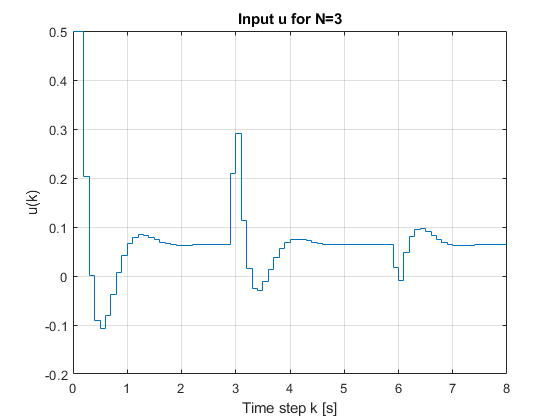

In [73]:
t = Ts*(0:nk); % simulation time

figure; 
    stairs(t,us(1,1:end)'); % constrained closed-loop    
    title(['Input u for N=',num2str(N)]);
    xlabel('Time step k [s]'); 
    ylabel('u(k)');
    grid on;


   

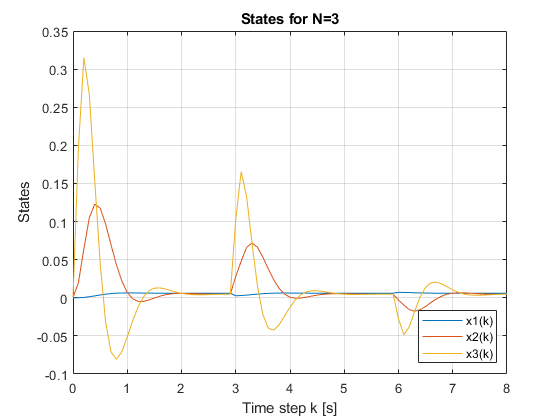

In [74]:
figure;
    plot(t,xs1,t,xs2,t,xs3); % constrained closed-loop      
    title(['States for N=',num2str(N)]);
    xlabel('Time step k [s]'); 
    ylabel('States'); 
    legend('x1(k)','x2(k)','x3(k)','Location','Southeast');
    grid on;




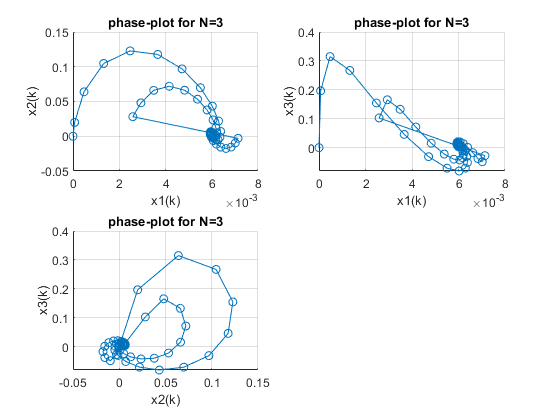

In [75]:
figure;
    subplot(2,2,1); 
    hold on;
    plot(xs1,xs2,'-o');
    title(['phase-plot for N=',num2str(N)]);
    xlabel('x1(k)'); 
    ylabel('x2(k)');
    grid on;
    
    subplot(2,2,2); 
    hold on;
    plot(xs1,xs3,'-o');
    title(['phase-plot for N=',num2str(N)]);
    xlabel('x1(k)'); 
    ylabel('x3(k)');
    grid on;
    
    
    subplot(2,2,3); 
    hold on;
    plot(xs2,xs3,'-o');
    title(['phase-plot for N=',num2str(N)]);
    xlabel('x2(k)'); 
    ylabel('x3(k)');
    grid on;
    


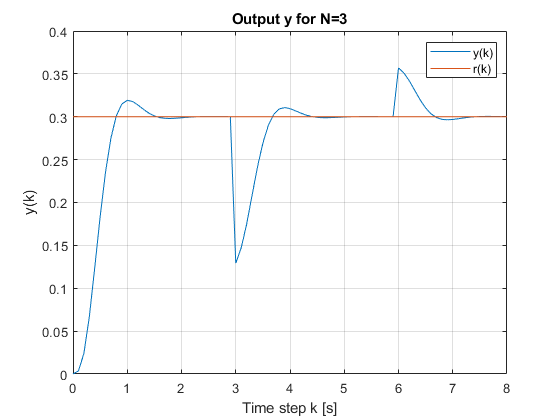

In [76]:
figure;
    plot(t,y,t,ref);
    title(['Output y for N=',num2str(N)]);
    xlabel('Time step k [s]'); 
    ylabel('y(k)');    
    legend('y(k)','r(k)');
    grid on;



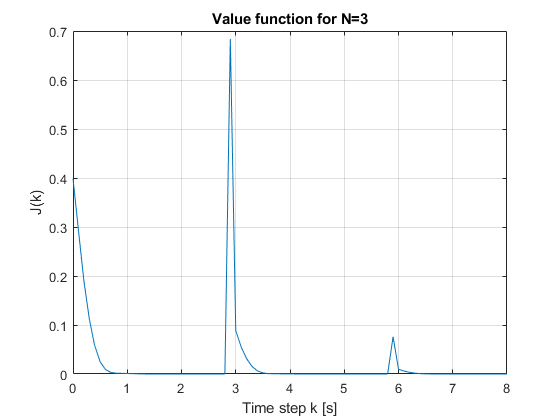

In [77]:
figure;
    plot(t,J);
    title(['Value function for N=',num2str(N)]);
    xlabel('Time step k [s]'); 
    ylabel('J(k)');
    grid on;

# References

[1] James B. Rawlings and Mayne David Q. *Model Predictive Control Theory and Design*. Nob Hill Pub, Llc, 2009. ISBN: 9780975937709.

[2] Jan Maciejowski. *Predictive Control with Constraints*. Prentice Hall, 2000. ISBN: 978-0201398236.

[3] P. Trodden, Lecture Notes ACS616 2018/19

[4] S. Dughman, J.A. Rossiter, *A survey of guaranteeing feasibility and stability in MPC during target changes* 9th International Symposium on Advanced Control of Chemical Processes, June 2015.